In [1]:
# All imports are here
%matplotlib inline
import numpy as np
from scipy.stats import cauchy
from scipy.stats import norm
import scipy.stats as sts
import matplotlib.pyplot as plt
from typing import Dict, Tuple

### 1.a

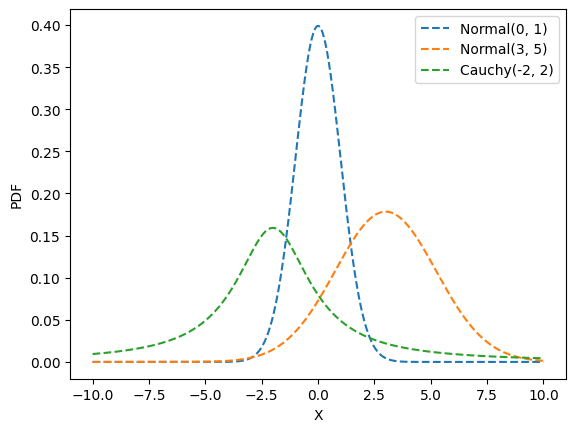

In [2]:
# create a sample data of thousand points
sample_data = np.linspace(-10, 10, 1000)

# generate a PDFs
# normal distribution with mean = 0 and variance = 1
pdf1 = norm.pdf(sample_data, 0, np.sqrt(1))
plt.plot(sample_data, pdf1, label='Normal(0, 1)', ls="--")

# normal distribution with mean = 3 and variance = 5
pdf2 = norm.pdf(sample_data, 3, np.sqrt(5))
plt.plot(sample_data, pdf2, label='Normal(3, 5)', ls="--")

# cauchy distribution with location = -2 and scale = 2
pdf3 = cauchy.pdf(sample_data, -2, 2)
plt.plot(sample_data, pdf3, label='Cauchy(-2, 2)', ls="--")


plt.xlabel("X")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.show()

### 1.b

In [3]:
# Question 1.b
def normal_qq_plot(data: np.array):
    """
    This function plots a normal QQ plot of the given data
    :param data: 1D numpy array of data
    :return: None
    """
    # sort the data
    sorted_data = np.sort(data)

    # normalize the data
    sorted_data = (sorted_data - np.mean(sorted_data)) / np.std(sorted_data)

    # calculate the quantiles
    quantiles = np.arange(1, len(data) + 1) / len(data)

    # calculate the z values from normal distribution for these quantiles
    theoretical_quantiles = norm.ppf(quantiles)

    # plot the quantiles of the sample against the quantiles of the normal distribution
    fig = plt.figure()
    plt.plot(theoretical_quantiles, theoretical_quantiles, label="Normal distribution", color="red")

    plt.scatter(theoretical_quantiles, sorted_data, label="Sample data")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.legend(loc='upper left')
    plt.title("Normal QQ Plot")

### 1.c

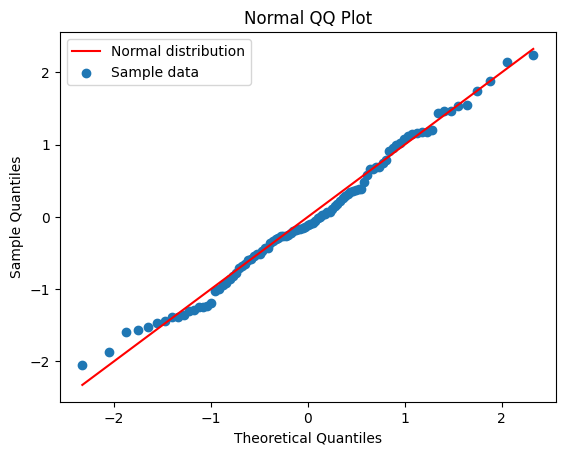

In [4]:
# Question 1.c
# draw 100 samples from normal distribution
data = np.random.normal(loc=0, scale=1, size=100)
normal_qq_plot(data)

### 1.d

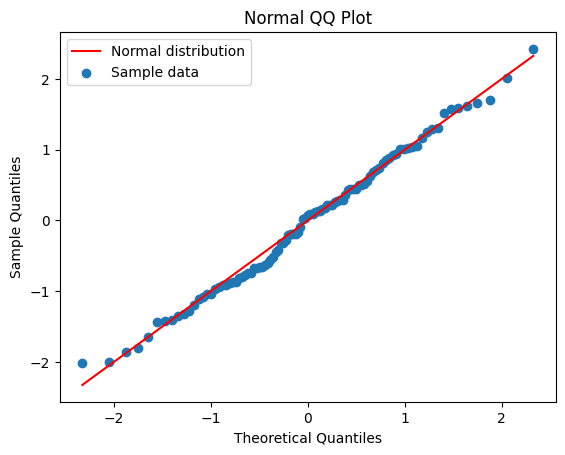

In [5]:
# Question 1.d
# draw 100 samples from normal distribution
data = np.random.normal(loc=3, scale=5, size=100)
normal_qq_plot(data)

### 1.e

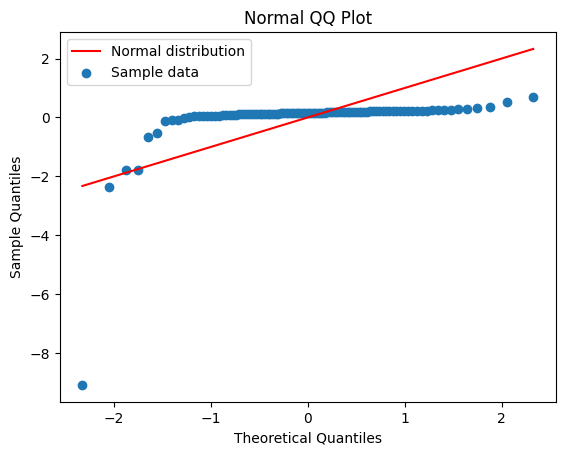

In [6]:
# Question 1.e
# draw 100 samples from cauchy distribution
data = cauchy.rvs(loc=-2, scale=2, size=100)
normal_qq_plot(data)

### 3

In [7]:
# Question 3
def linear_regression_least_squared(x: np.array, y:np.array) -> Dict[str, float]:
  """
  This function calculates the linear regression of the given data
  :param x: 1D numpy array of data
  :param y: 1D numpy array of data
  :return: dictionary of the linear regression parameters
  """
  # least squared estimate of the slope
  slope = np.sum((x - np.mean(x))*y) / np.sum((x - np.mean(x)) ** 2)

  # least squared estimate of intercept
  intercept = np.mean(y) - slope * np.mean(x)

  # predicted data
  predicted = intercept + np.multiply(x, slope)

  degrees_of_freedom = len(y) - 2

  # mean squared error of residuals
  residual = np.sum((y - predicted) ** 2)
  mean_squared_error = residual / degrees_of_freedom

  # variance of slope
  variance_slope = mean_squared_error / np.sum((x - np.mean(x)) ** 2)

  # null hypothesis: slope = 0
  t_statistic = slope / np.sqrt(mean_squared_error / np.sqrt(np.sum((x - np.mean(x)) ** 2)))

  # p-value
  p_value = 2 * (1 - norm.cdf(np.abs(t_statistic)))

  return {
    "slope": slope,
    "intercept": intercept,
    "mean_squared_error": mean_squared_error,
    "variance_slope": variance_slope,
    "degrees_of_freedom": degrees_of_freedom,
    "t_statistic": t_statistic, 
    "p_value": p_value
    }

### 4.a

In [8]:
# Question 4
def simulate_data(beta_zero:float, beta_one:float, size:int=10) -> Tuple:
    """
    Simulated 2 datasets with the given parameters
    :param beta_zero: intercept
    :param beta_one: slope
    :param size: size of the dataset
    :return: 2 datasets
    """
    # generate numbers between -10 and 10
    x = np.linspace(-10, 10, size)

    # generate error term using normal distribution
    np.random.seed(1234)
    error_one = np.random.normal(loc=0, scale=1, size=size)
    error_two = np.random.normal(loc=0, scale=1, size=size)

    # generate data points
    y1 = beta_zero + beta_one * x + error_one
    y2 = beta_zero + beta_one * x + error_two
    return ((x, y1), (x, y2))

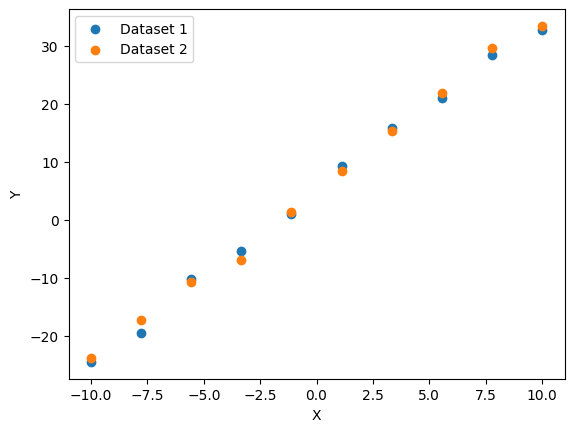

In [9]:
# Question 4.a
dataset_one, dataset_two = simulate_data(5, 3, 10)

# plot the data
plt.scatter(dataset_one[0], dataset_one[1], label="Dataset 1")
plt.scatter(dataset_two[0], dataset_two[1], label="Dataset 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper left')
plt.show()

### 4.b

In [10]:
# Question 4.b
dataset_one, dataset_two = simulate_data(beta_zero=5, beta_one=3, size=10)

print("Dataset 1: ")
print(linear_regression_least_squared(x=dataset_one[0], y=dataset_one[1]))
print()
print("Dataset 2: ")
print(linear_regression_least_squared(x=dataset_two[0], y=dataset_two[1]))

Dataset 1: 
{'slope': 2.942176209941913, 'intercept': 4.856316507553226, 'mean_squared_error': 1.2128330506394975, 'variance_slope': 0.002976953851569676, 'degrees_of_freedom': 8, 't_statistic': 12.002601799524864, 'p_value': 0.0}

Dataset 2: 
{'slope': 2.951801381392065, 'intercept': 5.121089004530573, 'mean_squared_error': 1.3382143962344275, 'variance_slope': 0.003284708063484504, 'degrees_of_freedom': 8, 't_statistic': 11.46387687795998, 'p_value': 0.0}


### 5.b

In [11]:
def generate_data_normal_error(
        x: Tuple, 
        beta_zero:float, 
        beta_one:float, 
        error_loc:float, 
        error_scale:float, 
        size:int=10) -> Tuple:
    """
    Generate dataset with the given parameters
    The error term is generated from normal distribution
    :param x: a tuple of values X can take
    :param beta_zero: intercept
    :param beta_one: slope
    :param error_loc: loc parameter for error distribution
    :param error_scale: scale parameter for error distribution
    :param size: size of the dataset
    :return: dataset
    """
    # generate X from the given values randomly
    sample = np.random.choice(x, size=size, replace=True)

    # reject the cases where all x values are same
    while len(set(sample)) == 1:
        sample = np.random.choice(x, size=size, replace=True)

    # generate error term using normal distribution
    error = np.random.normal(loc=error_loc, scale=error_scale, size=size)

    y = beta_zero + beta_one * sample + error
    return (sample, y)

In [12]:
def plot_sampling_distribution_normal_error(
        x: Tuple,
        beta_zero:float, 
        beta_one:float, 
        error_loc:float, 
        error_scale:float, 
        size:int=10, 
        samples:int=1000):
    """
    Plot the sampling distribution of the given data using normal error distribution
    :param x: a tuple of values X can take
    :param beta_zero: intercept
    :param beta_one: slope
    :param error_loc: loc parameter for error distribution
    :param error_scale: scale parameter for error distribution
    :param size: size of the dataset
    :param samples: number of datasets to generate
    :return: None
    """
    # generate 1000 datasets
    datasets = [
        generate_data_normal_error(
            x=x, 
            beta_zero=beta_zero,
            beta_one=beta_one,
            error_loc=error_loc,
            error_scale=error_scale,
            size=size) 
            for _ in range(samples)]

    # calculate the slope for each dataset
    slopes = [
        linear_regression_least_squared(x=data[0], y=data[1])["slope"] 
        for data in datasets]

    # plot the histogram
    plt.hist(slopes, bins=30,  label="Observed value")
    plt.axvline(x=beta_one, color="red", label="True value")
    plt.xlabel("Slope")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.title(f"Sampling Distribution of Slope for n={size}")
    plt.show()

#### Sampling distribution for n = 3 and error scale = 1

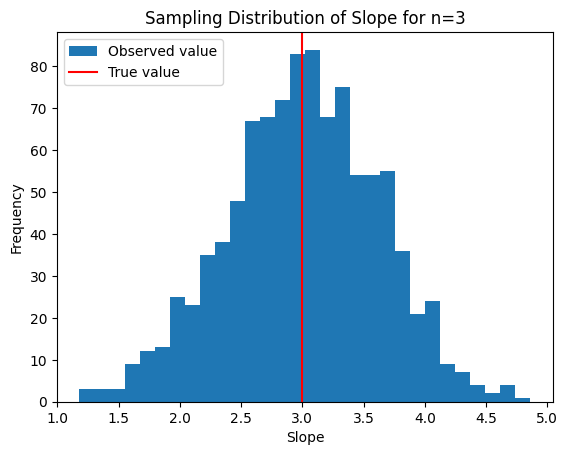

In [13]:
plot_sampling_distribution_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=1,
    size=3,
    samples=1000)

#### Sampling distribution for n = 100 and error scale = 1

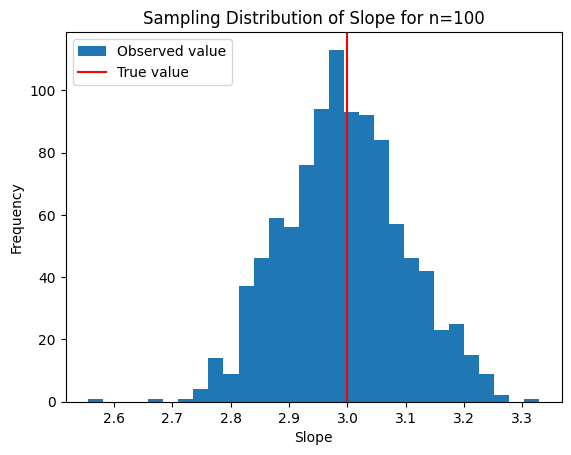

In [14]:
plot_sampling_distribution_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=1,
    size=100,
    samples=1000)

### 5.c
#### Sampling distribution for n = 3 and error scale = 100

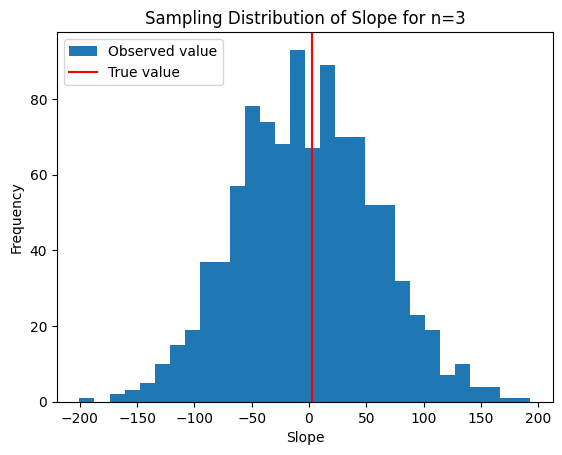

In [15]:
plot_sampling_distribution_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=100,
    size=3,
    samples=1000)

#### Sampling distribution for n = 100 and error scale = 100

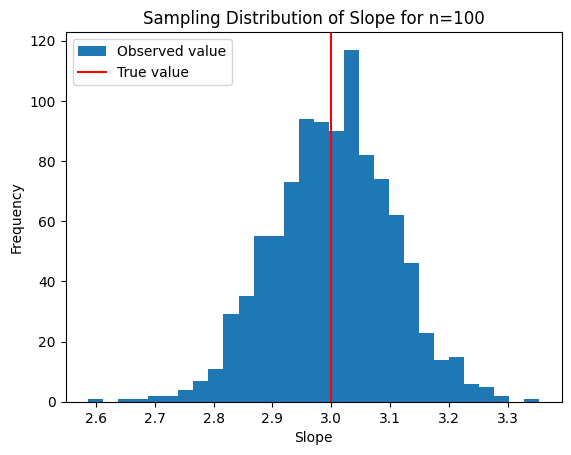

In [16]:
plot_sampling_distribution_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=1,
    size=100,
    samples=1000)

### 5.d

In [17]:
def generate_data_chi_squared_error(
        x: Tuple, 
        beta_zero:float, 
        beta_one:float, 
        dof:int,
        size:int=10) -> Tuple:
    """
    Generate dataset with the given parameters
    The error term is generated from chi squared distribution
    :param x: a tuple of values X can take
    :param beta_zero: intercept
    :param beta_one: slope
    :param dof: degrees of freedom for chi squared distribution
    :param size: size of the dataset
    :return: dataset
    """
    # generate X from the given values randomly
    sample = np.random.choice(x, size=size, replace=True)

    # reject the cases where all x values are same
    while len(set(sample)) == 1:
        sample = np.random.choice(x, size=size, replace=True)

    # generate error term using chi squared distribution
    error = np.random.chisquare(df=dof, size=size)

    y = beta_zero + beta_one * sample + error
    return (sample, y)

In [18]:
def plot_sampling_distribution_chi_squared_error(
        x: Tuple,
        beta_zero:float, 
        beta_one:float, 
        dof: int,
        size:int=10, 
        samples:int=1000):
    """
    Plot the sampling distribution of the given data using normal error distribution
    :param x: a tuple of values X can take
    :param beta_zero: intercept
    :param beta_one: slope
    :param dof: degrees of freedom for chi squared distribution
    :param size: size of the dataset
    :param samples: number of datasets to generate
    :return: None
    """
    # generate 1000 datasets
    datasets = [
        generate_data_chi_squared_error(
            x=x, 
            beta_zero=beta_zero,
            beta_one=beta_one,
            dof=dof,
            size=size) 
            for _ in range(samples)]

    # calculate the slope for each dataset
    slopes = [
        linear_regression_least_squared(x=data[0], y=data[1])["slope"] 
        for data in datasets]

    # plot the histogram
    plt.hist(slopes, bins=30,  label="Observed value")
    plt.axvline(x=beta_one, color="red", label="True value")
    plt.xlabel("Slope")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.title(f"Sampling Distribution of Slope for n={size}")
    plt.show()

#### Sampling distribution for n = 3 with Chi Squared distribution, DOF = 10

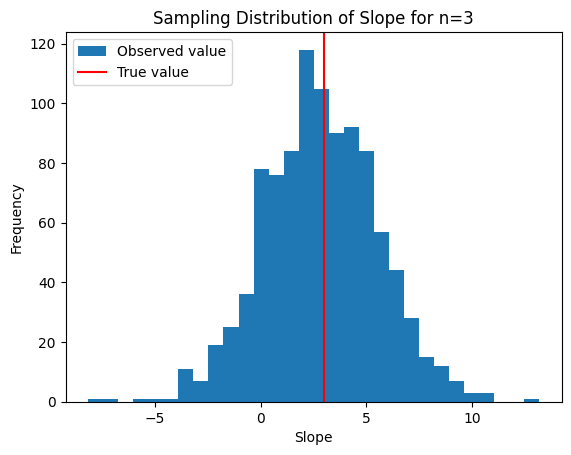

In [19]:
plot_sampling_distribution_chi_squared_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    dof=10,
    size=3,
    samples=1000)

#### Sampling distribution for n = 100 with Chi Squared distribution, DOF = 10

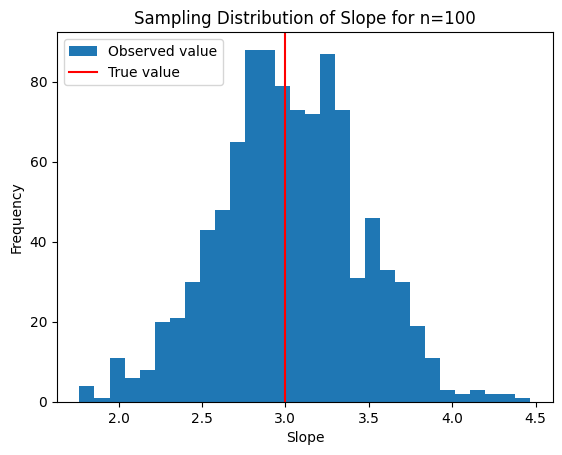

In [20]:
plot_sampling_distribution_chi_squared_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    dof=10,
    size=100,
    samples=1000)

### 6.b

In [21]:
def plot_confidence_interval_normal_error(
        x: Tuple,
        beta_zero:float, 
        beta_one:float, 
        error_loc:float, 
        error_scale:float, 
        confidence:float,
        size:int=10, 
        samples:int=1000):
    """
    Plot the confidence intervals of the mean for given data using normal error distribution
    :param x: a tuple of values X can take
    :param beta_zero: intercept
    :param beta_one: slope
    :param error_loc: loc parameter for error distribution
    :param error_scale: scale parameter for error distribution
    :param confidence: confidence level
    :param size: size of the dataset
    :param samples: number of datasets to generate
    :return: None
    """
    # generate 1000 datasets
    datasets = [
        generate_data_normal_error(
            x=x, 
            beta_zero=beta_zero,
            beta_one=beta_one,
            error_loc=error_loc,
            error_scale=error_scale,
            size=size) 
            for _ in range(samples)]

    # calculate the slope for each dataset
    results = [
        linear_regression_least_squared(x=data[0], y=data[1]) 
        for data in datasets]
    slopes = [x["slope"] for x in results]

    # Create a plot with 2 subplots
    fig = plt.figure(figsize=(10, 14))
    gridspace = plt.GridSpec(2, 1, height_ratios=[1, 2])

    # plot sampling distribution of slopes
    ax1 = plt.subplot(gridspace[0])
    ax1.set_title('Sampling Distribution of Slopes')
    ax1.hist(slopes, bins=20, density=True)
    ax1.axvline(beta_one, color='red', linestyle='dashed', linewidth=2, label='Mean Slope')

    # calculate confidence intervals for each slope
    ax2 = plt.subplot(gridspace[1], sharex=ax1)
    for idx, result in enumerate(results):
        ci = sts.t.interval(
            confidence=confidence,
            df=size - 1,
            loc=result["slope"],
            scale=np.sqrt(result["variance_slope"]))

        # plot CI color based on whether it catches the true value
        color = "green" if ci[0] <= beta_one <= ci[1] else "red"

        # Plot the intervals
        ax2.hlines(idx, ci[0], ci[1], colors=color)
        ax2.plot(result["slope"], idx, 'o', color='blue')

    # Plot true slope
    ax2.axvline(beta_one, color='red', linestyle='dashed', label='True Slope')

    ax2.set_xlabel('Slope')
    ax2.set_ylabel('Dataset')
    ax2.legend()
    plt.subplots_adjust(hspace=.0)
    plt.show()

#### 6.b Confidence intervals for 100 datasets with n = 3 and confidence level = 0.95

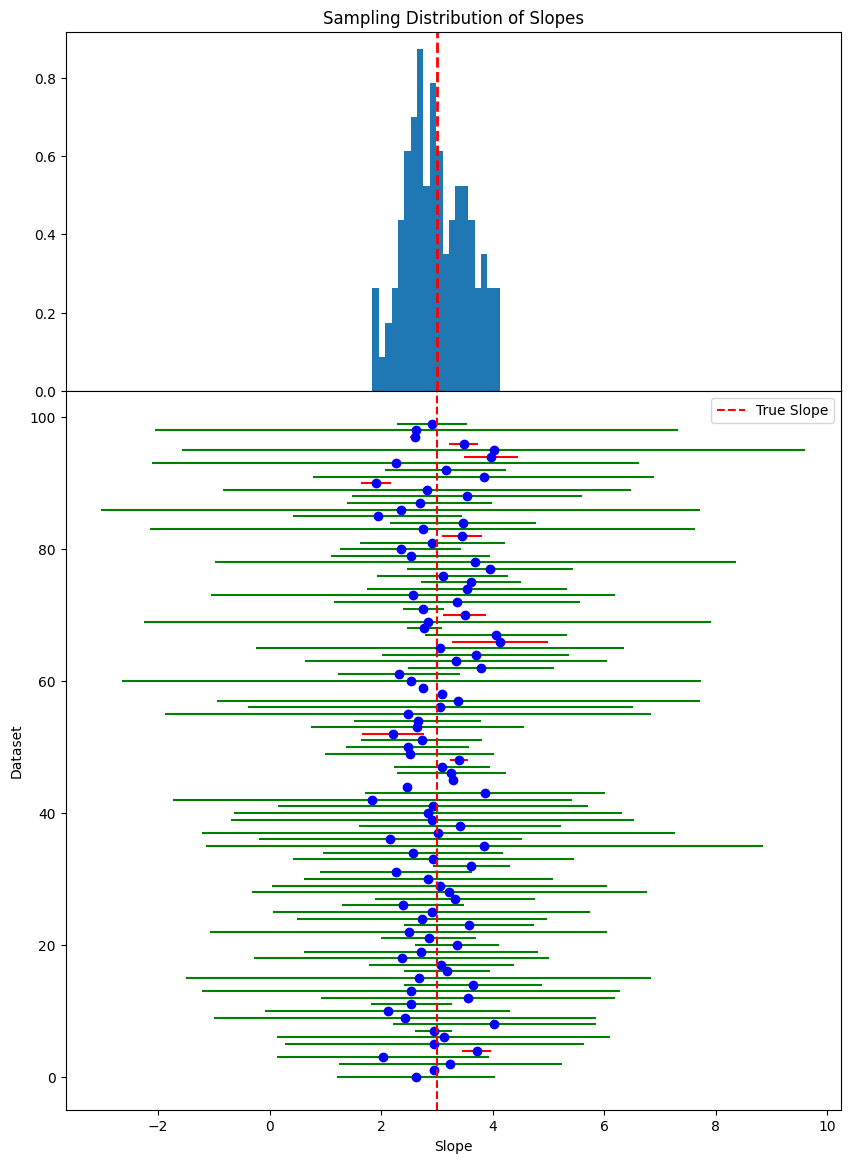

In [22]:
plot_confidence_interval_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=1,
    confidence=0.95,
    size=3,
    samples=100)

#### 6.c Confidence intervals for 100 datasets with n = 3 and confidence level = 0.99

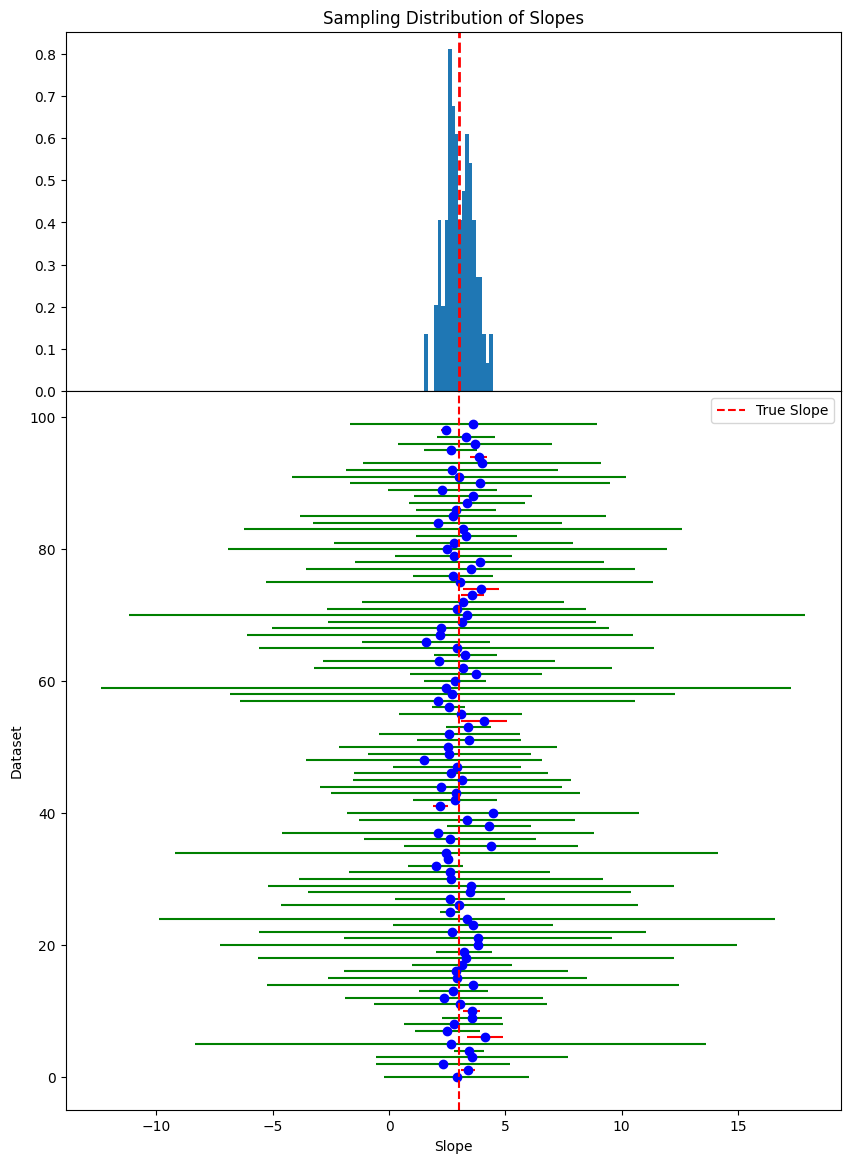

In [23]:
plot_confidence_interval_normal_error(
    x=(0, 2),
    beta_zero=5,
    beta_one=3,
    error_loc=0,
    error_scale=1,
    confidence=0.99,
    size=3,
    samples=100)